In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [2]:
df = pd.read_csv("Dataset_B_hotel.csv")

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

Dataset ini terdiri dari 36275 baris dan 19 kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Dataset ini memiliki 19 kolom dengan masing-masing data type seperti tertera di atas.

In [5]:
df.duplicated().sum()

np.int64(0)

Dataset ini tidak memiliki nilai duplikat.

In [6]:
for col in df.columns:
  print(df[col].value_counts())
  print("\n")

Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN36259    1
INN36258    1
           ..
INN00008    1
INN00007    1
INN00006    1
INN00005    1
INN00004    1
Name: count, Length: 36275, dtype: int64


no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64


no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64


no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64


type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64


required_car_parking_space
0.0    33910
1.0     

Berikut adalah unique values yang terdapat dalam masing-masing kolom.

# **Encode target variable**

In [7]:
df_booking_status = {"booking_status": {"Canceled":0, "Not_Canceled" :1}}

df = df.replace(df_booking_status)

<ipython-input-7-0012eb17fa4f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(df_booking_status)


In [8]:
df.drop('Booking_ID', axis=1, inplace=True)

Kolom target yaitu booking_status diencode menjadi biner dengan Canceled = 0 dan Not_Canceled = 1.

Setelah itu, kolom Booking_ID di drop karena tidak memberi infomasi tambahan atau punya pengaruh dalam pembangunan model.

# **Data Splitting**

In [9]:
input_df = df.drop('booking_status',axis=1)
output_df = df['booking_status']

x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

*   input_df: berisi kolom-kolom pada dataset tanpa kolom target yaitu booking_status.

*   output_df: berisi kolom target yaitu booking_status.

*   Data dibagi menjadi 80% training dan 20% testing.


In [10]:
print("shape X_train: ", x_train.shape)
print("shape X_test: ", x_test.shape)
print("shape y_train: ", y_train.shape)
print("shape y_test: ", y_test.shape)

shape X_train:  (29020, 17)
shape X_test:  (7255, 17)
shape y_train:  (29020,)
shape y_test:  (7255,)


Sehingga persebaran data menjadi:


*   X_train: (29020, 17)

*   X_test:  (7255, 17)

*   y_train:  (29020,)

*   y_test:  (7255,)


# **Fix X data**

In [11]:
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


Dapat dilihat dari tabel ini, ada missing values pada 3 kolom yaitu type_of_meal_plan, required_car_parking_space, dan avg_price_per_room. Masing-masing akan diimpute antara dengan median atau modus tergantung pada jenis kolomnya.

Impute missing value pada kolom kategorikal ('type_of_meal_plan' & 'required_car_parkinig_space')

In [12]:
mode_meal = x_train['type_of_meal_plan'].mode()[0]
x_train['type_of_meal_plan'].fillna(mode_meal, inplace=True)
x_test['type_of_meal_plan'].fillna(mode_meal, inplace=True)

mode_parking = x_train['required_car_parking_space'].mode()[0]
x_train['required_car_parking_space'].fillna(mode_parking, inplace=True)
x_test['required_car_parking_space'].fillna(mode_parking, inplace=True)

<ipython-input-12-8336b42b6282>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['type_of_meal_plan'].fillna(mode_meal, inplace=True)
<ipython-input-12-8336b42b6282>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Impute missing values untuk kolom numerikal ('avg_price_per_room')

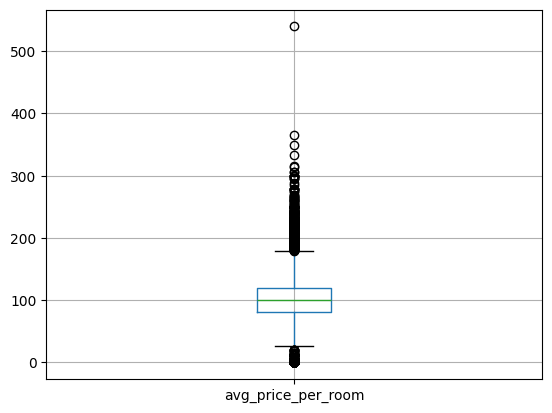

In [13]:
boxplot = x_train.boxplot(column=['avg_price_per_room'])
plt.show()

Karena ada banyak outlier pada avg_price_per_room, maka missing values akan diimpute dengan median karena lebih tahan terhadap outlier dibandingkan mean.

In [14]:
x_train['avg_price_per_room'].fillna(x_train['avg_price_per_room'].median(), inplace=True)

<ipython-input-14-8551ff2582c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['avg_price_per_room'].fillna(x_train['avg_price_per_room'].median(), inplace=True)


In [15]:
median_price = x_train['avg_price_per_room'].median()

median_price

99.45

Data x_test akan diimpute dengan nilai median avg_price_per_room dari data x_train.

In [16]:
x_test['avg_price_per_room'].fillna(median_price, inplace=True)

<ipython-input-16-17ba5e4b2d50>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['avg_price_per_room'].fillna(median_price, inplace=True)


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 26817 to 2732
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  float64
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_ty

In [18]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
26817,2,0,2,3,Meal Plan 1,0.0,Room_Type 1,244,2018,10,30,Online,0,0,0,85.85,0
7537,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,276,2018,9,22,Online,0,0,0,95.00,0
6217,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,233,2018,10,14,Online,0,0,0,90.00,0
22883,2,0,2,2,Meal Plan 1,0.0,Room_Type 1,156,2018,7,2,Online,0,0,0,93.08,1
28669,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,76,2018,4,12,Online,0,0,0,69.33,0


# **Visualisasi**

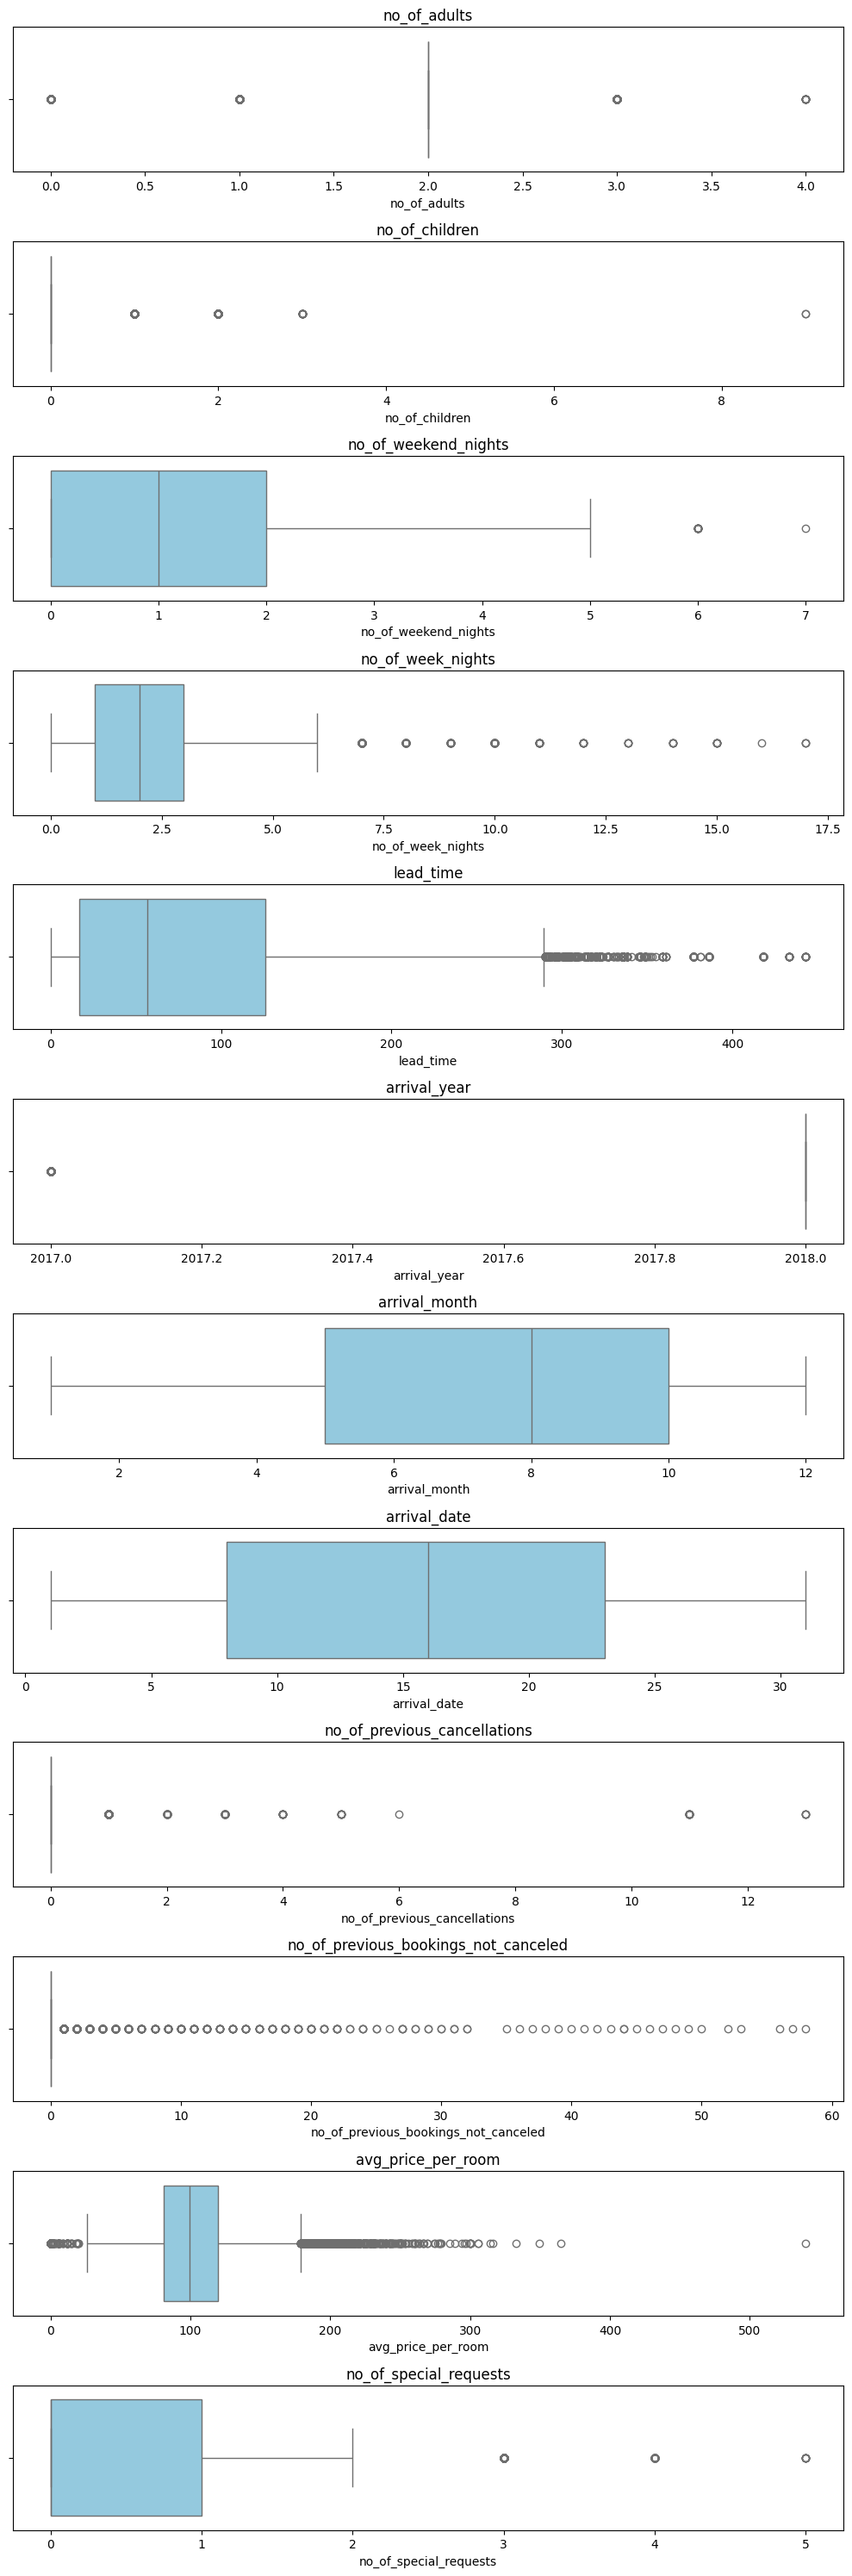

In [19]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
            'no_of_week_nights', 'lead_time', 'arrival_year',
            'arrival_month', 'arrival_date', 'no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
            'no_of_special_requests']

plt.figure(figsize=(10,30))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=x_train[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

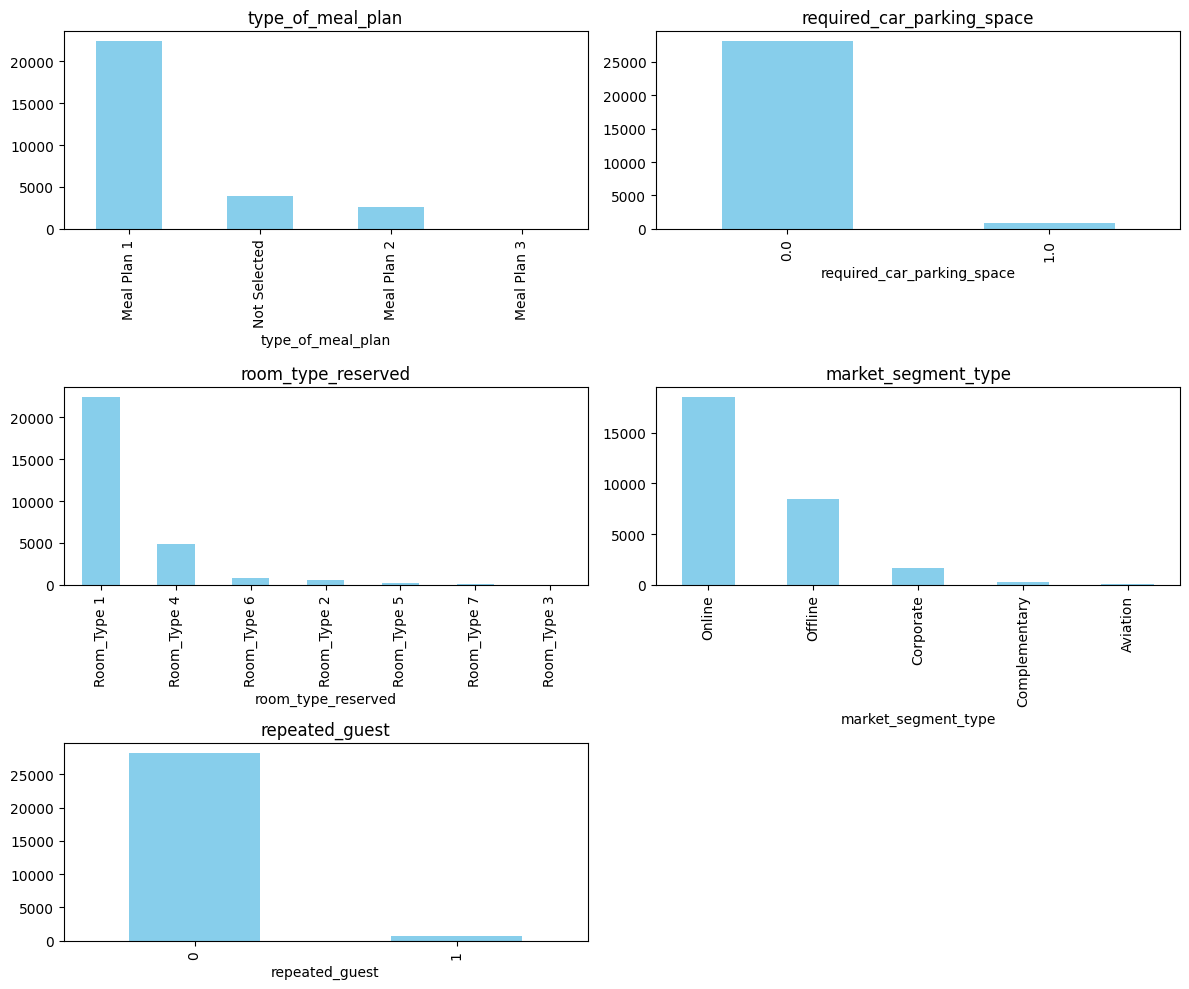

In [20]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
            'room_type_reserved', 'market_segment_type', 'repeated_guest']

plt.figure(figsize=(12, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    x_train[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

# **Encoding**

1. Label Encoding:
  *  type_of_meal_plan
  *  room_type_reserved
2. One Hot Encoding:
  *  market_segment_type

In [21]:
mealenc = {"type_of_meal_plan": {"Not Selected": 0,
                              "Meal Plan 1": 1,
                              "Meal Plan 2": 2,
                              "Meal Plan 3": 3,
                             }}

x_train = x_train.replace(mealenc)
x_test = x_test.replace(mealenc)

<ipython-input-21-7f598c6aa1d4>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train = x_train.replace(mealenc)
<ipython-input-21-7f598c6aa1d4>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test = x_test.replace(mealenc)


In [22]:
roomenc = {"room_type_reserved": {"Room_Type 1": 1,
                              "Room_Type 2": 2,
                              "Room_Type 3": 3,
                              "Room_Type 4": 4,
                              "Room_Type 5": 5,
                              "Room_Type 6": 6,
                              "Room_Type 7": 7,
                             }}

x_train = x_train.replace(roomenc)
x_test = x_test.replace(roomenc)

<ipython-input-22-41b88983c640>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train = x_train.replace(roomenc)
<ipython-input-22-41b88983c640>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test = x_test.replace(roomenc)


In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

x_train_enc = pd.DataFrame(enc.fit_transform(x_train[['market_segment_type']]), columns=enc.get_feature_names_out())

x_test_enc = pd.DataFrame(enc.transform(x_test[['market_segment_type']]), columns=enc.get_feature_names_out())

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train = pd.concat([x_train, x_train_enc], axis=1)
x_test = pd.concat([x_test, x_test_enc], axis=1)

x_train = x_train.drop(columns=['market_segment_type'])
x_test = x_test.drop(columns=['market_segment_type'])

x_train = x_train.drop('index', axis=1, errors='ignore')
x_test = x_test.drop('index', axis=1, errors='ignore')

In [24]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,2,3,1,0.0,1,244,2018,10,...,0,0,0,85.85,0,0.0,0.0,0.0,0.0,1.0
1,2,0,0,3,1,0.0,1,276,2018,9,...,0,0,0,95.00,0,0.0,0.0,0.0,0.0,1.0
2,2,0,1,2,1,0.0,1,233,2018,10,...,0,0,0,90.00,0,0.0,0.0,0.0,0.0,1.0
3,2,0,2,2,1,0.0,1,156,2018,7,...,0,0,0,93.08,1,0.0,0.0,0.0,0.0,1.0
4,2,0,0,3,1,0.0,1,76,2018,4,...,0,0,0,69.33,0,0.0,0.0,0.0,0.0,1.0


In [25]:
x_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,3,0,2,3,1,0.0,4,22,2018,4,...,0,0,0,152.60,2,0.0,0.0,0.0,0.0,1.0
1,2,0,0,3,1,0.0,1,193,2017,10,...,0,0,0,65.00,0,0.0,0.0,0.0,1.0,0.0
2,2,0,0,2,2,0.0,1,257,2017,7,...,0,0,0,99.45,0,0.0,0.0,0.0,1.0,0.0
3,2,0,2,4,1,0.0,4,7,2018,6,...,0,0,0,156.00,1,0.0,0.0,0.0,0.0,1.0
4,2,0,0,2,2,0.0,1,39,2017,8,...,0,0,0,101.50,0,0.0,0.0,0.0,1.0,0.0


# **Random Forest**

In [26]:
RF_class = RandomForestClassifier()
RF_class.fit(x_train, y_train)
y_predict = RF_class.predict(x_test)
print('\nClassification Report for Random Forest\n')

labels = [0, 1]
print(classification_report(y_test, y_predict, labels = labels))


Classification Report for Random Forest

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2401
           1       0.91      0.95      0.93      4854

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



**Akurasi Random Forest**

Model memiliki akurasi sebesar **90%**, artinya dari total **7.255** data uji, sekitar **6.530** prediksi berhasil ditebak dengan benar—baik itu pemesanan yang Canceled maupun Not_Canceled.


# **XG Boost**

In [27]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(x_train, y_train)

y_predict = xgb_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [28]:
print('\nClassification Report for XG Boost Model\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report for XG Boost Model

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2401
           1       0.91      0.94      0.92      4854

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255



**Accuracy**:

Akurasi sebesar **89%** berarti model berhasil memprediksi booking_status dengan benar pada 86% dari seluruh data uji. Dengan total **7.255** data uji, sekitar **6.234** prediksi sesuai dengan label sebenarnya, baik itu "Canceled" maupun "Not_Canceled".










# **Perbandingan Model**

Dari perbandingan accuracy kedua model tersebut, Random Forest memiliki accuracy yang lebih tinggi dibandingkan XG Boost dengan masing-masing accuracy sebesar 90% dan 89%. Sehingga, model yang di save adalah Random Forest.

# **Save pickle**

In [29]:
import pickle as pkl

filename = 'rf_model.pkl'
pkl.dump(RF_class, open(filename, 'wb'))